## Lana Del Rey Music Analysis

In this analysis, I will be diving into Lana Del Rey's Albums and Tracks along with their popularity ratings given by Spotify. I am drawing from the Spotify API and for context as to how the popularity scores are calculated I have included the description of the popularity score calculation below.

"The Spotify popularity score is a numerical representation of how well a track is performing on the platform. It ranges from 0 to 100, with higher scores indicating higher popularity. This score influences the track’s visibility on Spotify, including its likelihood of being featured on algorithmic playlists like Discover Weekly and Release Radar.

Spotify’s popularity score is determined by a variety of factors:

* Streams: The number of times a track is streamed.
* Recent Activity: More weight is given to recent streams.
* Engagement: Includes likes, shares, saves, and playlist additions.
* Listener Behavior: How long listeners play the track and if they skip it.
* User Interactions: Actions such as follows, comments, and social shares."

Courtesy of: [Understanding Spotify’s Popularity Score](https://yourmusicmanager.com/understanding-spotifys-popularity-score/)

### Connect to Spotify API and load data in 

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Spotify application credentials
client_id = 'cd45358b132040b2b3cca21d71d5e2e2'
client_secret = 'fa837301661d430db3f015e002d1af82'
redirect_uri = 'http://localhost:8888/callback'  
scope = 'user-library-read' 

# Create SpotifyOAuth instance
sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope)

# Initialize Spotify API object
sp = spotipy.Spotify(auth=token_info['access_token'])

# Function to fetch tracks for an album
def fetch_album_tracks(album_id):
    tracks = []
    album_tracks = sp.album_tracks(album_id)
    for track in album_tracks['items']:
        track_data = {
            'Track Name': track['name'],
            'Track Popularity': sp.track(track['id'])['popularity'],  # Fetch popularity for each track
            'Album ID': album_id,
            'Album Name': sp.album(album_id)['name']  # Linking track to album
        }
        tracks.append(track_data)
    return tracks

# Fetch Lana Del Rey's albums
results = sp.search(q='artist:Lana Del Rey', type='album', limit=50)

# Initialize lists to store album and track data
albums_data = []
tracks_data = []

# Iterate over each album in the results
for album in results['albums']['items']:
    # Extract album details
    album_data = {
        'Album Name': album['name'],
        'Release Date': album['release_date'],
        'Total Tracks': album['total_tracks'],
        'Album Type': album['album_type']
    }
    albums_data.append(album_data)
    
    # Fetch and append tracks for the current album
    tracks_data.extend(fetch_album_tracks(album['id']))

# Convert albums data into Pandas DataFrame
albums_df = pd.DataFrame(albums_data)

# Convert tracks data into Pandas DataFrame
tracks_df = pd.DataFrame(tracks_data)

# Display the DataFrames
print("DataFrame of Lana Del Rey's Albums:")
print(albums_df)

print("\nDataFrame of Lana Del Rey's Tracks:")
print(tracks_df)

DataFrame of Lana Del Rey's Albums:
                                           Album Name Release Date  \
0                                           Honeymoon   2015-09-18   
1                  Summertime Sadness (Imanbek Remix)   2013-03-07   
2                                       Ultraviolence   2014-01-01   
3                                          West Coast   2014-01-01   
4                                             Arcadia   2021-09-08   
5                                 Video Games Remixes   2012-01-01   
6   Summertime Sadness [Lana Del Rey vs. Cedric Ge...   2014-01-01   
7                                      Blue Banisters   2021-10-22   
8                                            Paradise   2012-11-09   
9                                                Ride   2012-01-01   
10                                      Lust For Life   2017-07-21   
11                                        Born To Die   2012-01-30   
12                       Summertime Sadness (Sped Up) 

Take a look at the data

In [48]:
albums_df.head(10)

,Album Name,Release Date,Total Tracks,Album Type
0,Arcadia,2021-09-08,1,single
1,Ultraviolence,2014-01-01,11,album
2,Ultraviolence (Deluxe),2014-01-01,14,album
3,Blue Banisters,2021-10-22,15,album
4,Lust For Life,2017-07-21,16,album
5,Honeymoon,2015-09-18,14,album
6,Paradise,2012-11-09,8,album
7,Norman Fucking Rockwell!,2019-08-30,14,album
8,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,2014-01-01,1,single
9,Young And Beautiful,2013-01-01,1,single


In [50]:
tracks_df.head(10)

,Track Name,Track Popularity,Album ID,Album Name
0,Arcadia,49,2AVn0YgzBtqsa0d6R5QD95,Arcadia
1,Cruel World,36,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
2,Ultraviolence,43,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
3,Shades Of Cool,40,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
4,Brooklyn Baby,44,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
5,West Coast,44,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
6,Sad Girl,43,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
7,Pretty When You Cry,42,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
8,Money Power Glory,36,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence
9,Fucked My Way Up To The Top,36,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence


Sort by Popularity

In [146]:
tracks_df_sorted = tracks_df.sort_values(by='Track Popularity', ascending=False)

In [156]:
# reset index
tracks_df_sorted = tracks_df_sorted.reset_index(drop = True)
tracks_df_sorted.head(15)

,Track Name,Track Popularity,Album ID,Album Name
0,Young And Beautiful,85,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
1,Say Yes To Heaven,85,6jVg0POvGYH1Pt6lISl3ok,Say Yes To Heaven
2,West Coast,83,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
3,Cinnamon Girl,82,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
4,Brooklyn Baby,81,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
5,Let The Light In (feat. Father John Misty),80,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...
6,Doin' Time,79,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
7,Art Deco,79,2DpEBrjCur1ythIZ10gJWw,Honeymoon
8,Margaret (feat. Bleachers),79,5HOHne1wzItQlIYmLXLYfZ,Did you know that there's a tunnel under Ocean...
9,Chemtrails Over The Country Club,78,6QeosPQpJckkW0Obir5RT8,Chemtrails Over The Country Club


Checking for Missing Values

In [58]:
if tracks_df['Track Popularity'].isnull().any():
    print("contains missing values")
    # Optionally handle missing values
    tracks_df['Track Popularity'].fillna(tracks_df['Track Popularity'].mean(), inplace=True)  # or df['A'].dropna(inplace=True)

Summary Statistics

In [61]:
tracks_df.describe()

,Track Popularity
count,275.000000
mean,53.440000
std,13.453591
min,21.000000
25%,44.000000
50%,53.000000
75%,63.000000
max,85.000000


Extract most popular 5 songs

In [66]:
most_popular_songs = tracks_df.nlargest(5, 'Track Popularity')
most_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
94,Young And Beautiful,85,1D92WOHWUI2AGQCCdplcXL,Young And Beautiful
148,Say Yes To Heaven,85,6jVg0POvGYH1Pt6lISl3ok,Say Yes To Heaven
16,West Coast,83,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)
85,Cinnamon Girl,82,5XpEKORZ4y6OrCZSKsi46A,Norman Fucking Rockwell!
15,Brooklyn Baby,81,1ORxRsK3MrSLvh7VQTF01F,Ultraviolence (Deluxe)


Visualize:

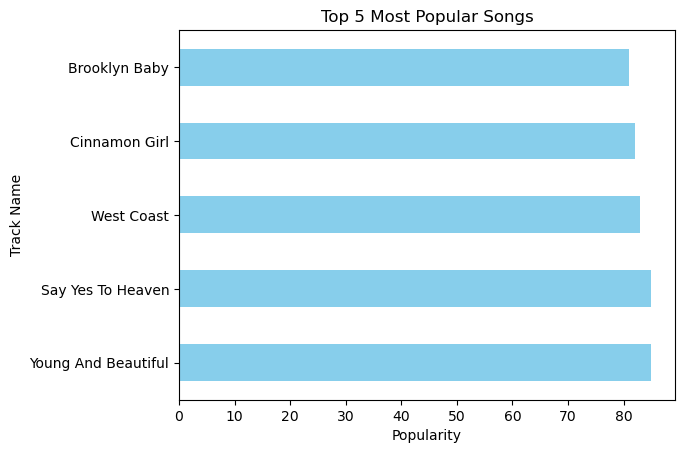

In [100]:
import matplotlib.pyplot as plt

most_popular_songs.plot(kind='barh', x='Track Name', y='Track Popularity', legend=False, color='skyblue')

# Add title and labels
plt.title('Top 5 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Track Name')

# Show the plot
plt.show()

Extract least popular 5 songs

In [69]:
least_popular_songs = tracks_df.nsmallest(5, 'Track Popularity')
least_popular_songs

,Track Name,Track Popularity,Album ID,Album Name
175,Video Games - Jamie Woon Remix,21,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
250,Chloë,21,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
249,(Everything But) Her Love,22,3hL6ZIcwV6zUfqRiPLPBLJ,Buddy's Rendezvous
173,Video Games - Jakwob and Etherwood Remix,23,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
93,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,24,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...


Visualize:

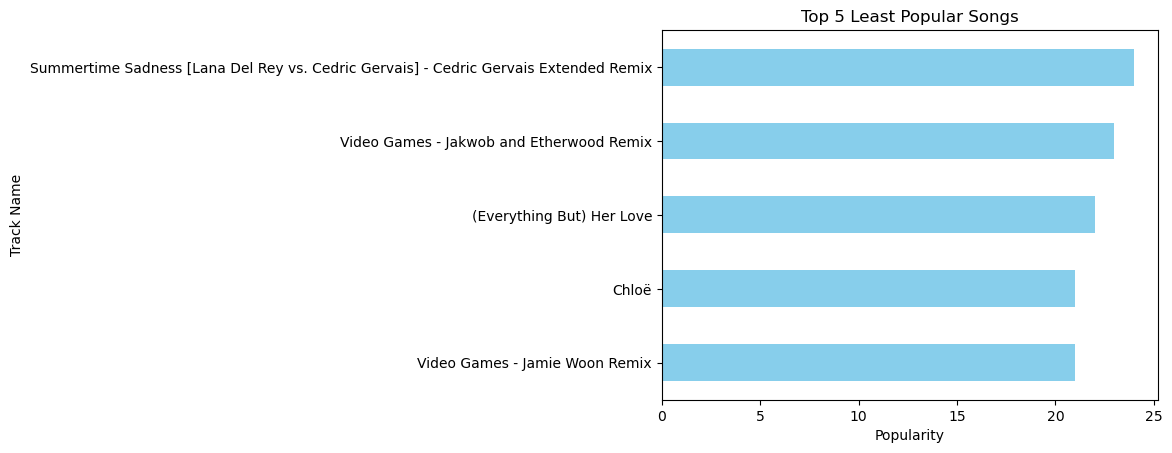

In [102]:
least_popular_songs.plot(kind='barh', x='Track Name', y='Track Popularity', legend=False, color='skyblue')

# Add title and labels
plt.title('Top 5 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Track Name')

# Show the plot
plt.show()

A good majority of the least popular songs are remixes, to be expected. 

### Extracting Remix Tracks

In [72]:
remix_tracks = tracks_df[tracks_df['Track Name'].str.contains('remix', case=False)]
remix_tracks

,Track Name,Track Popularity,Album ID,Album Name
93,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,24,7EsPt342xAGvGDz9wCrH6S,Summertime Sadness [Lana Del Rey vs. Cedric Ge...
109,Born To Die - Woodkid & The Shoes Remix,39,4X8hAqIWpQyQks2yRhyqs4,Born To Die
147,Summer Bummer - Snakehips Remix,43,7tSNHl6gCeuLj81GZO43Xn,Summer Bummer (Snakehips Remix)
170,Summer Bummer - Clams Casino Remix,38,3gY2PiLHPaOmYApYJYPpIi,Summer Bummer (Clams Casino Remix)
171,Lust For Life - BloodPop® Remix,41,3RQdSuT8Y2WGynwlFrJI58,Lust For Life (BloodPop® Remix)
172,Video Games - Club Clique For The Bad Girls Remix,35,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
173,Video Games - Jakwob and Etherwood Remix,23,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
175,Video Games - Jamie Woon Remix,21,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
176,Video Games - We Don’t Belong In Pacha Remix,27,5xQF02P2MtoIIqMCB1MOoM,Video Games Remixes
190,Young And Beautiful [Lana Del Rey vs. Cedric G...,42,02duSuiRA2CHxrCdeRUHz5,Young And Beautiful [Lana Del Rey vs. Cedric G...


Visualizing Remix Track Popularity

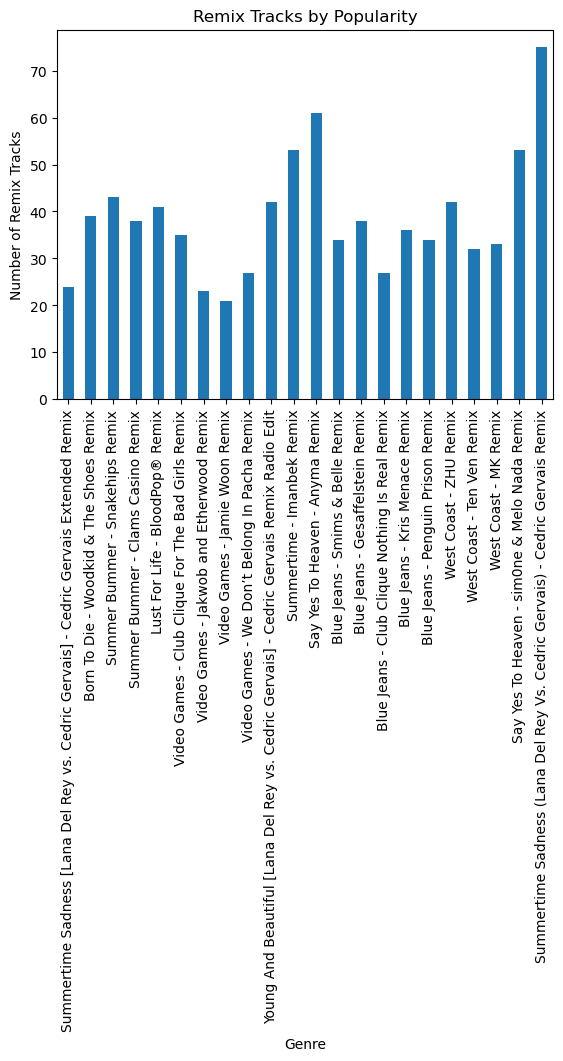

In [122]:
# Plotting
remix_tracks.plot(kind='bar', x='Track Name', y='Track Popularity', legend=None)
plt.title('Remix Tracks by Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Remix Tracks')
plt.show()

The remix with the highest popularity rating seems to be Summertime Sadness with Cedric Gervais. Since Summertime Sadness is the 14th most popular song this remix would be expected to be a more popular one. However, the extended remix is 5th least popular song, contrary to the regular remix version.

In [152]:
summer_sad_df = tracks_df_sorted[tracks_df_sorted['Track Name'] == 'Summertime Sadness']
summer_sad_df.idxmax()

Track Name           14
Track Popularity     14
Album ID             38
Album Name          237
dtype: int64

Sidenote: Summertime Sadness is often considered by the public Lana Del Rey's most popular song. However, on the basis of how Spotify calculates the popularity ratings, the songs more frequently streamed or shared by fans of LDR appear to be more popular based on the type of calculation.

### Delving into Lana Del Rey's debu album, Born to Die:

In [76]:
btd = tracks_df[tracks_df['Track Name'].str.contains('Born to Die', case=False)]
btd

,Track Name,Track Popularity,Album ID,Album Name
97,Born To Die,53,4X8hAqIWpQyQks2yRhyqs4,Born To Die
109,Born To Die - Woodkid & The Shoes Remix,39,4X8hAqIWpQyQks2yRhyqs4,Born To Die
110,Born To Die,55,4vXt6IpMcSnqonljffWlMI,Born To Die
122,Born To Die,69,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version)
194,Born To Die,63,5PW8nAtvf2HV8RYZFd4IrX,Born To Die - The Paradise Edition
231,Born To Die,47,3TtsWmvFbChKTWIRfa85lS,Born To Die (Bonus Track Version)
263,Born To Die,37,5IjSLZhlg0qVq62r2PSfM1,Born To Die


Inference about multiple versions/remixes: Artists release multiple remixes in order to get more streams even if the songs are the same

## Album Analysis

Next, we want to total all the popularity ratings for each album and see whats going on with the repeated songs/albums.

In [108]:
# Merging tracks and albums dataframes on Album Name
merged_df = pd.merge(tracks_df, albums_df, on='Album Name')
merged_df

,Track Name,Track Popularity,Album ID,Album Name,Release Date,Total Tracks,Album Type
0,Arcadia,49,2AVn0YgzBtqsa0d6R5QD95,Arcadia,2021-09-08,1,single
1,Cruel World,36,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence,2014-01-01,11,album
2,Ultraviolence,43,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence,2014-01-01,11,album
3,Shades Of Cool,40,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence,2014-01-01,11,album
4,Brooklyn Baby,44,2e3doCyb0qn2JeKLsh2Xbo,Ultraviolence,2014-01-01,11,album
...,...,...,...,...,...,...,...
365,Say Yes To Heaven - sim0ne & Melo Nada Remix,53,7xIg7rC6R80DJqV0001u2J,Say Yes To Heaven (sim0ne & Melo Nada Remix),2023-05-20,2,single
366,Say Yes To Heaven,41,7xIg7rC6R80DJqV0001u2J,Say Yes To Heaven (sim0ne & Melo Nada Remix),2023-05-20,2,single
367,Season Of The Witch,60,4K7RKXggxezOmccv1Uuviq,"Season Of The Witch (From The Motion Picture ""...",2019-08-09,1,single
368,"Take Me Home, Country Roads",69,5qDjtBY8cC4bO6wytuGOuT,"Take Me Home, Country Roads",2023-12-01,1,single


In [110]:
# Grouping Album ID and Album Name by Popularity 
# Summing the total popularity for all the tracks in each album
album_popularity = merged_df.groupby(['Album ID', 'Album Name'])['Track Popularity'].sum().reset_index()

In [83]:
# Sorting the Albums 
album_popularity = album_popularity.sort_values(by='Track Popularity', ascending=False)

In [84]:
# Extracting the Born to Die albums along with their popularity
btd_albums = album_popularity[album_popularity['Album Name'].str.contains('Born to Die', case=False)]
btd_albums

,Album ID,Album Name,Track Popularity
27,4X8hAqIWpQyQks2yRhyqs4,Born To Die,1887
28,4vXt6IpMcSnqonljffWlMI,Born To Die,1818
1,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),1398
33,5PW8nAtvf2HV8RYZFd4IrX,Born To Die - The Paradise Edition,1258
32,5IjSLZhlg0qVq62r2PSfM1,Born To Die,1239
22,3TtsWmvFbChKTWIRfa85lS,Born To Die (Bonus Track Version),655


There seems to be multiple Born To Die Albums with varying popularity ratings along with some special editions and bonus track versions.

Upon further research, this seems to be a result of artists usually releasing multiple versions in different countries.  